In [102]:
import networkx as nx
from torch_geometric.utils import to_networkx

G = nx.Graph()

In [80]:
paper_nodes = [1,2,3,4]
author_nodes = ['A', 'B', 'C', 'D', 'E']
G.add_nodes_from(paper_nodes, bipartite='paper')
G.add_nodes_from(author_nodes, bipartite='author')
G.add_edges_from([(1, 'A'), (1, 'C'), (1, 'D'), (2, 'A'), (2, 'B'), (2, 'E'), (3, 'B'), (3, 'C'), (4, 'A'), (4, 'C')])

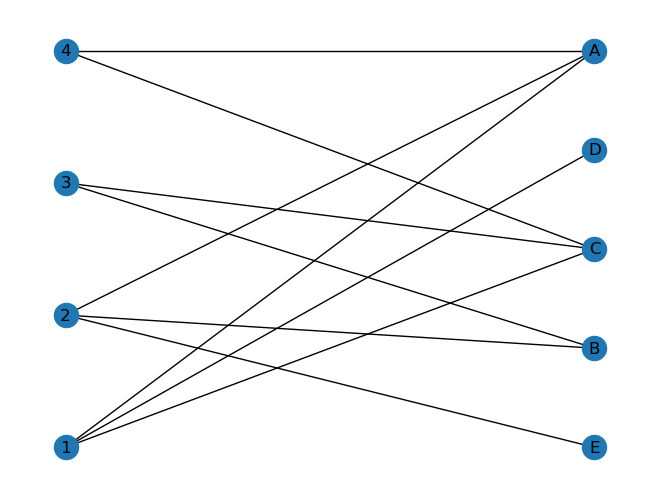

In [81]:
# plot bipartite graph  
pos = nx.drawing.bipartite_layout(G, [1,2,3,4])
nx.draw(G, pos=pos, with_labels=True)

In [82]:
# adjacency matrix
A = nx.adjacency_matrix(G, nodelist=paper_nodes + author_nodes, weight=None)
print(A.todense())

# block matrix
B = A[:len(paper_nodes), len(paper_nodes):]
print(B.todense())

[[0 0 0 0 1 0 1 1 0]
 [0 0 0 0 1 1 0 0 1]
 [0 0 0 0 0 1 1 0 0]
 [0 0 0 0 1 0 1 0 0]
 [1 1 0 1 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]]
[[1 0 1 1 0]
 [1 1 0 0 1]
 [0 1 1 0 0]
 [1 0 1 0 0]]


In [83]:
nx.adjacency_matrix(G, nodelist=paper_nodes + author_nodes, weight=None)

<9x9 sparse array of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

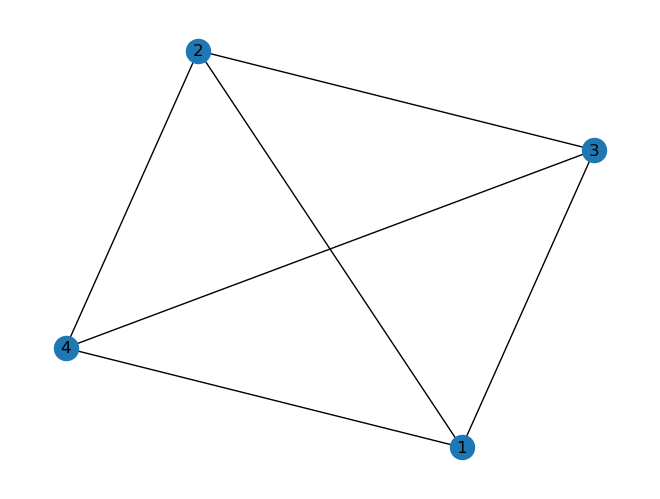

In [84]:
# plot projected graph on paper nodes
P = nx.projected_graph(G, [1,2,3,4])
nx.draw(P, with_labels=True)

In [85]:
import numpy as np
# paper-paper adjacency matrix
A_pp = nx.adjacency_matrix(P, nodelist=paper_nodes, weight=None)
print(A_pp.toarray())

# matrix formulation of the paper-paper adjacency matrix
A_pp = B @ B.T
A_pp[A_pp > 0] = 1

# delete self-loops
A_pp.setdiag(0)
print(A_pp.toarray())


[[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]
[[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]


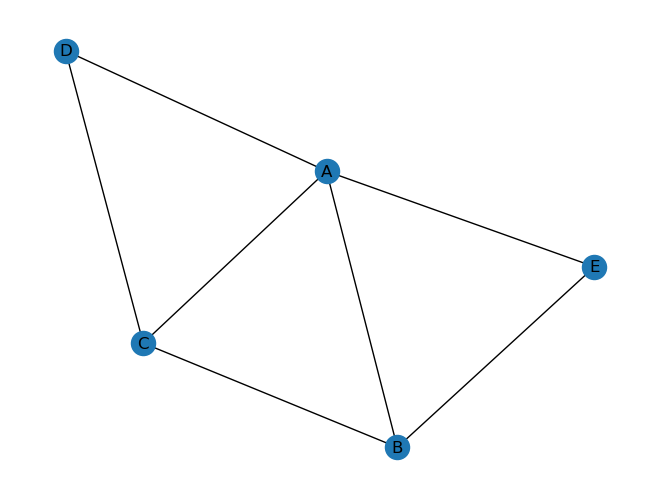

In [86]:
# plot projected graph on author nodes
P = nx.projected_graph(G, ['A', 'B', 'C', 'D', 'E'])
nx.draw(P, with_labels=True)

In [87]:
# author-author adjacency matrix
A_aa = nx.adjacency_matrix(P, nodelist=author_nodes, weight=None)
print(A_aa.todense())

# mathematical formulation of the author-author adjacency matrix
A_aa = B.T @ B
A_aa[A_aa > 0] = 1
# delete self-loops
A_aa.setdiag(0)
print(A_aa.toarray())

[[0 1 1 1 1]
 [1 0 1 0 1]
 [1 1 0 1 0]
 [1 0 1 0 0]
 [1 1 0 0 0]]
[[0 1 1 1 1]
 [1 0 1 0 1]
 [1 1 0 1 0]
 [1 0 1 0 0]
 [1 1 0 0 0]]


In [90]:
A_aa = nx.adjacency_matrix(P, nodelist=author_nodes, )
A_aa.toarray()

array([[0, 1, 1, 1, 1],
       [1, 0, 1, 0, 1],
       [1, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0]])

In [106]:
import torch_geometric as pyg

# load cora dataset
dataset = pyg.datasets.Planetoid(root='data', name='Cora')

In [107]:
data = dataset[0]
# plot graph
G = to_networkx(data)

# Interface backend with Elasticsearch

In [3]:
from datetime import datetime
from elasticsearch import Elasticsearch

# Create a connection
es = Elasticsearch()

# Define a document
doc = {
    'author': 'test',
    'text': 'Elasticsearch: cool.',
    'timestamp': datetime.now(),
}

# Index a document (id is optional)
res = es.index(index="test-index", id=1, body=doc)
print(res['result'])

# Refresh the index to make sure the document is searchable immediately
es.indices.refresh(index="test-index")

# Search
res = es.search(index="test-index", body={"query": {"match_all": {}}})

print("Got %d Hits:" % res['hits']['total']['value'])
for hit in res['hits']['hits']:
    print("%(timestamp)s %(author)s: %(text)s" % hit["_source"])


created
Got 1 Hits:
2023-05-24T01:04:01.084518 test: Elasticsearch: cool.
